In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import re
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix




ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (/Users/unmeshgupta/.local/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

# Round 1

In [55]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [56]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [57]:
churnData["TotalCharges"] = pd.to_numeric(churnData["TotalCharges"], errors='coerce')


In [58]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [59]:
mean_value = churnData['TotalCharges'].value_counts().mean()

In [60]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_value)

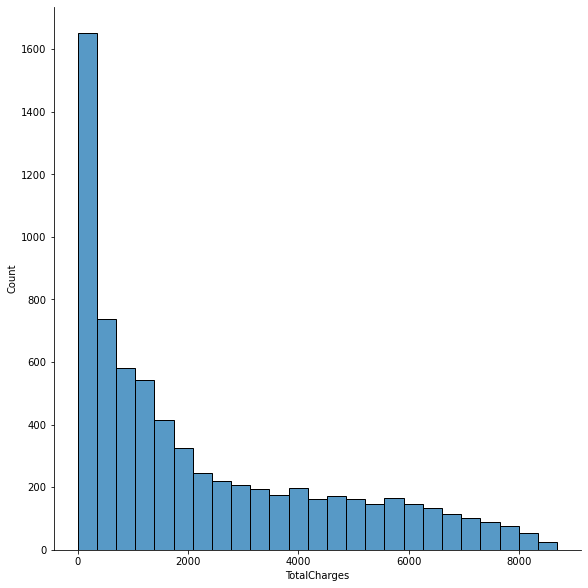

In [61]:
sns.displot(churnData['TotalCharges'],height=8.27, aspect=1)

In [62]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [63]:
df = churnData.loc[:, ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]


In [64]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [65]:
# Map the binary values to 0's and 1's
binary_map = {'Yes': 1, 'No': 0}
df['Churn'] = df['Churn'].map(binary_map)

In [66]:

# Split the dataframe into features and labels
X = df.drop('Churn', axis=1)
y = df['Churn']


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))


,Error_metric,Train,Test
0,Accuracy,0.787185,0.798439
1,Precision,0.649284,0.694215
2,Recall,0.425889,0.444444


Confusion matrix for the train set
[[3800  343]
 [ 856  635]]


Confusion matrix for the test set
[[957  74]
 [210 168]]


In [67]:
# Iterate over the range of k values and fit a kNN classifier with each k value
for k in range(1, 16):
    # Create a kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn.fit(X_train, y_train)

    # Evaluate the classifier on the testing data
    accuracy = knn.score(X_test, y_test)

    # Print the accuracy for the current k value
    print(f"k = {k}: accuracy = {accuracy:.3f}")


k = 1: accuracy = 0.710
k = 2: accuracy = 0.759
k = 3: accuracy = 0.741
k = 4: accuracy = 0.764
k = 5: accuracy = 0.770
k = 6: accuracy = 0.775
k = 7: accuracy = 0.776
k = 8: accuracy = 0.784
k = 9: accuracy = 0.784
k = 10: accuracy = 0.782
k = 11: accuracy = 0.780
k = 12: accuracy = 0.784
k = 13: accuracy = 0.782
k = 14: accuracy = 0.786
k = 15: accuracy = 0.786


In [68]:
def knn_classifier(k):
    # Create a kNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn.fit(X_train, y_train)

    # Predict the labels of the testing data
    y_pred = knn.predict(X_test)

    # Calculate precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Plot the confusion matrix
    plot_confusion_matrix(knn, X_test, y_test)
    plt.title(f"k = {k}")

    # Return precision and recall
    return precision, recall



In [69]:


# Iterate over the range of k values and calculate precision and recall for each k value
for k in range(1, 16):
    # Calculate precision and recall for the current k value
    precision, recall = knn_classifier(k)

    # Print precision and recall for the current k value
    print(f"k = {k}: precision = {precision:.3f}, recall = {recall:.3f}")

# Show the confusion matrix plots
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

# Round 2



In [70]:
df.shape

(7043, 5)

In [71]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [72]:
churnData.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No


In [73]:
churnData['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [74]:
# Map the binary values to 0's and 1's
binary_map = {'Yes': 1, 'No': 0}
churnData['Churn'] = churnData['Churn'].map(binary_map)

In [75]:
numeric_cols = df.select_dtypes(include=['int', 'float']).columns.tolist()
numeric_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

In [76]:
categorical_cols = churnData.select_dtypes(include=['object']).columns.tolist()
categorical_cols


['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract']

In [77]:
# convert the binary variable to 0 and 1
churnData['Partner'] = churnData['Partner'].replace({'No': 0, 'Yes': 1})
churnData['Dependents'] = churnData['Dependents'].replace({'No': 0, 'Yes': 1})
churnData['PhoneService'] = churnData['PhoneService'].replace({'No': 0, 'Yes': 1})

In [78]:
churnData['OnlineSecurity'] = churnData['OnlineSecurity'].apply(lambda x: re.sub(r'\s+(\w)', r'_\1', x))
churnData['OnlineBackup'] = churnData['OnlineBackup'].apply(lambda x: re.sub(r'\s+(\w)', r'_\1', x))
churnData['DeviceProtection'] = churnData['DeviceProtection'].apply(lambda x: re.sub(r'\s+(\w)', r'_\1', x))
churnData['TechSupport'] = churnData['TechSupport'].apply(lambda x: re.sub(r'\s+(\w)', r'_\1', x))
churnData['StreamingTV'] = churnData['StreamingTV'].apply(lambda x: re.sub(r'\s+(\w)', r'_\1', x))
churnData['Contract'] = churnData['Contract'].apply(lambda x: re.sub(r'\s+(\w)', r'_\1', x))


In [79]:
# encode the categorical columns using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
cat_encoded = encoder.fit_transform(churnData[categorical_cols])

# concatenate the encoded categorical and numerical columns
treated_df = pd.concat([pd.DataFrame(cat_encoded, columns=encoder.get_feature_names_out(categorical_cols)),
               churnData[numeric_cols]], axis=1)


/Users/unmeshgupta/.local/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [80]:
treated_df

,gender_Female,gender_Male,Partner_0,Partner_1,Dependents_0,Dependents_1,PhoneService_0,PhoneService_1,OnlineSecurity_No,OnlineSecurity_No_internet_service,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One_year,Contract_Two_year,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,1,29.85,29.85,0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,34,56.95,1889.50,0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,2,53.85,108.15,1
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0,45,42.30,1840.75,0
4,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,24,84.80,1990.50,0
7039,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0,72,103.20,7362.90,0
7040,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0,11,29.60,346.45,0
7041,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1,4,74.40,306.60,1


In [81]:
# Split the dataframe into features and labels
df_X = treated_df.drop('Churn', axis=1)
df_y = treated_df['Churn']



## Data splitting
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.20, random_state=11)


In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def fit_and_evaluate_decision_tree(X_train, y_train, X_test, y_test, cat_cols):
    # Initialize the decision tree classifier
    dt_classifier = DecisionTreeClassifier()

    # Fit the decision tree classifier on the training data
    dt_classifier.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = dt_classifier.predict(X_test)

    # Calculate the accuracy score of the model
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy


In [83]:
accuracy = fit_and_evaluate_decision_tree(X_train, y_train, X_test, y_test, categorical_cols)
print("Accuracy:", accuracy)


Accuracy: 0.7224982256919801


,Error_metric,Train,Test
0,Accuracy,0.781328,0.782115
1,Precision,0.603517,0.613419
2,Recall,0.506372,0.507937


NameError: name 'plot_confusion_matrix' is not defined

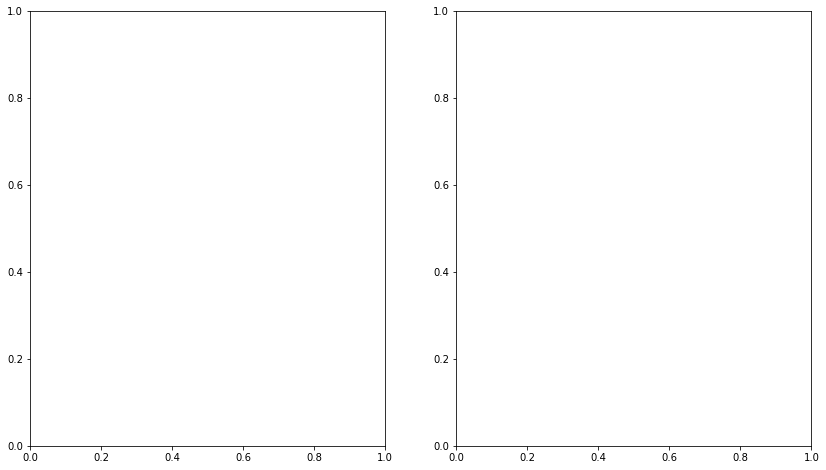

In [84]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.20, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [ ]:
## Feature Importance

plt.figure(figsize=(20,14))
plt.barh(df_X.columns,model.feature_importances_)

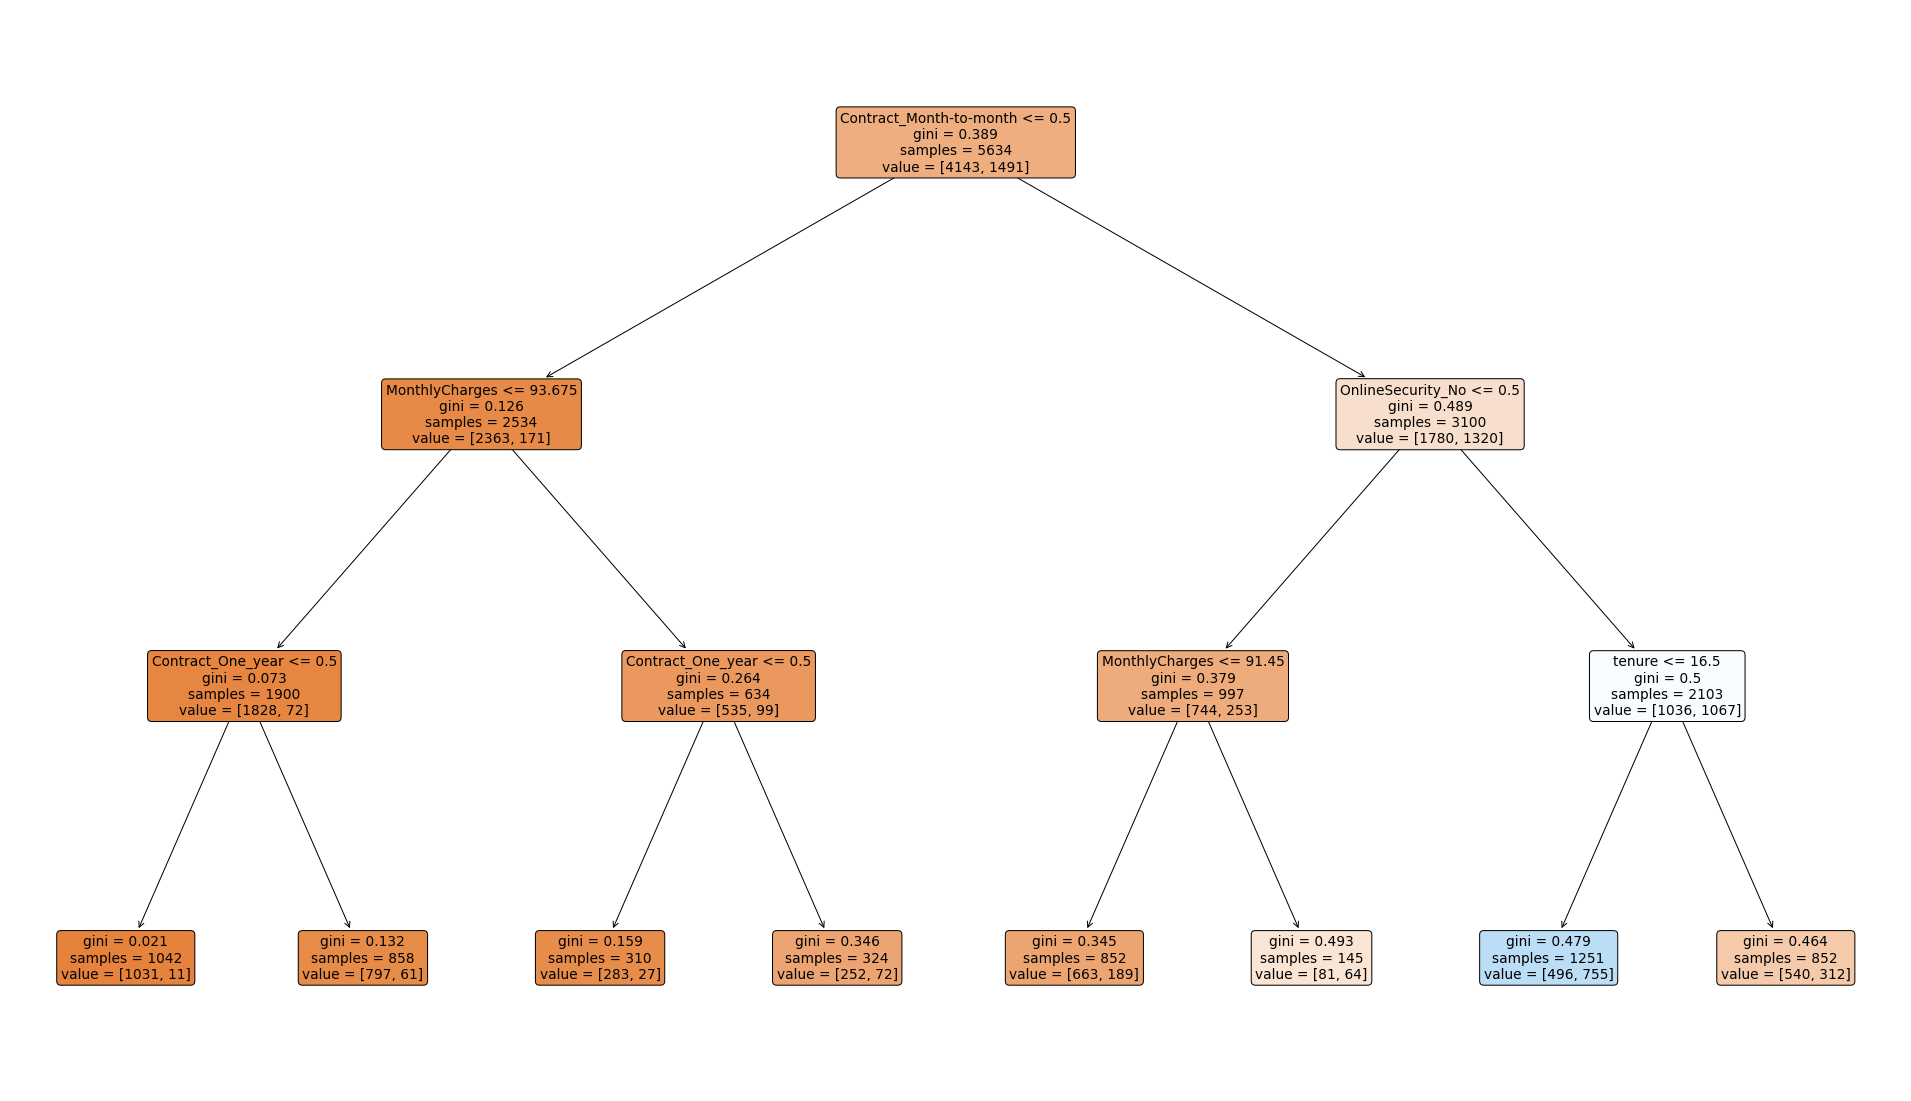

In [85]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=df_X.columns)
plt.show() 

# Round 3

### Treating imbalance in the data

In [86]:
# Separate majority and minority classes
majority_class = churnData[churnData.Churn==0]
minority_class = churnData[churnData.Churn==1]

In [87]:
majority_class.shape

(5174, 16)

In [88]:
minority_class.shape

(1869, 16)

In [89]:
# Upsample minority class
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([majority_class, minority_upsampled])

In [90]:
minority_upsampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
4290,Female,0,1,1,1,0,No,No,No,Yes,Yes,No,Month-to-month,40.10,40.10,1
5547,Female,0,0,0,3,1,No,No,No,No,Yes,Yes,Month-to-month,89.45,240.45,1
3302,Male,0,0,0,31,1,No,Yes,Yes,No,Yes,Yes,One_year,103.45,3066.45,1
4949,Male,0,0,0,5,0,No,Yes,No,No,Yes,Yes,Month-to-month,51.00,305.95,1
4307,Female,1,0,0,37,1,No,No,No,No,Yes,Yes,Month-to-month,96.55,3580.30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,Male,0,1,1,51,0,Yes,Yes,Yes,No,Yes,Yes,One_year,59.30,3014.65,1
4851,Female,1,0,0,3,1,No,No,No,No,No,No,Month-to-month,70.40,204.70,1
2567,Male,0,1,0,60,1,No,Yes,Yes,No,Yes,No,Month-to-month,95.75,5742.90,1
2054,Female,0,0,0,2,1,No,No,No,No,No,No,Month-to-month,49.40,106.55,1


In [91]:
df_upsampled

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,0,0,34,1,Yes,No,Yes,No,No,No,One_year,56.95,1889.50,0
3,Male,0,0,0,45,0,Yes,No,Yes,Yes,No,No,One_year,42.30,1840.75,0
6,Male,0,0,1,22,1,No,Yes,No,No,Yes,No,Month-to-month,89.10,1949.40,0
7,Female,0,0,0,10,0,Yes,No,No,No,No,No,Month-to-month,29.75,301.90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,Male,0,1,1,51,0,Yes,Yes,Yes,No,Yes,Yes,One_year,59.30,3014.65,1
4851,Female,1,0,0,3,1,No,No,No,No,No,No,Month-to-month,70.40,204.70,1
2567,Male,0,1,0,60,1,No,Yes,Yes,No,Yes,No,Month-to-month,95.75,5742.90,1
2054,Female,0,0,0,2,1,No,No,No,No,No,No,Month-to-month,49.40,106.55,1


In [92]:
df_upsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

In [93]:
from sklearn.model_selection import KFold, cross_val_score

# Assume X and y are the preprocessed feature and target datasets
# Assume clf is the pre-trained classifier

# Set the number of folds for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_val_score to get an array of scores from K-fold cross-validation
scores = cross_val_score(model, X, y, cv=k_fold, scoring='accuracy')

# Print the mean and standard deviation of the scores
print("Mean Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Mean Accuracy: 0.78 (+/- 0.01)


In [94]:
model1 = DecisionTreeClassifier()
model2 = LogisticRegression()
model3 = KNeighborsClassifier()

model_pipeline = [model1, model2, model3]
model_names = ['Classification Tree', 'Logistic Regression', 'KNN']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

/Users/unmeshgupta/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/unmeshgupta/.local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

{'Classification Tree': 0.7334049906934741, 'Logistic Regression': 0.7951711660028904, 'KNN': 0.767126923361823}


In [95]:

print("Comparing the 3 regression scores we find \n")

pd.DataFrame([scores], index=["score"])

Comparing the 3 regression scores we find 



,Classification Tree,Logistic Regression,KNN
score,0.733405,0.795171,0.767127


In [97]:
# Fit a Random Forest Classifier on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)
print("Random Forest Classifier Accuracy:", acc)

# Define the hyperparameters to tune
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None]
}

# Perform GridSearchCV to find the best hyperparameters
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1)
grid_rf.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy score

Random Forest Classifier Accuracy: 0.7856635911994322


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 500]})

In [100]:
# Print the best hyperparameters
print("Best Hyperparameters:", grid_rf.best_params_)

# Predict on the test data
y_pred = grid_rf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8069552874378992
